In [2]:
# Библиотека для работы с табличными данными
import pandas as pd
# Библиотека для вычислений линейной алгебры
import numpy as np
# Библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

# Чтение и предварительный просмотр данных

В своей практике использую набор данных:

 "Категоризация заработной платы в областях науки о данных"

In [112]:
# Считываем файл .csv в dataframe с помощью библиотеки pandas
df = pd.read_csv('/content/drive/MyDrive/Python/Data_Science_Fields_Salary_Categorization.csv')
# удаляю лишний столбец
df.drop(['Unnamed: 0'],axis=1, inplace=True)

**О наборе данных**

Набор данных по категоризации заработной платы в областях науки о данных содержит 9 столбцов: -
								
***Working_Year***	Год выплаты заработной платы (2020, 2021, 2022)

***Designation***	Рабочая роль в течение года

***Experience***	Уровень опыта работы в течение года. 

[ EN - начальный уровень / Junior, MI - средний уровень / Intermediate, SE - старший уровень / Expert, EX - исполнительный уровень / Director ]

***Employment_Status***	Тип занятости для роли. 

[PT – неполный рабочий день, FT – полный рабочий день, CT – контракт, FL – фриланс]

***Salary_In_Rupees*** 	Общая сумма выплаченной брутто-зарплаты в рупиях.

***Employee_Location***	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166 (ссылка PFB на код страны ISO 3166)
ISO 3166 Country Code -
https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes

***Company_Location***	Страна главного офиса или договаривающегося филиала работодателя.

***Company_Size***	Среднее количество людей, проработавших в компании в течение года. 

[ S (малый) — менее 50 сотрудников, M (средний) — от 50 до 250 сотрудников, L (крупный) — более 250 сотрудников]

***Remote_Working_Ratio***	Общий объем работы, выполненной удаленно. 

[0 – нет удаленной работы (менее 20 %), 50 – частично удаленная работа, 100 – полностью удаленная работа (более 80 %)]


In [113]:
# Смотри первые 5 строк 
df.head(5)

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50


In [114]:
# смотрим крайние 5 строк
df.tail(5)

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
602,2022,Data Engineer,SE,FT,"12,253,703.00",US,US,M,100
603,2022,Data Engineer,SE,FT,"10,025,757.00",US,US,M,100
604,2022,Data Analyst,SE,FT,"10,264,466.00",US,US,M,0
605,2022,Data Analyst,SE,FT,"11,935,425.00",US,US,M,100
606,2022,AI Scientist,MI,FT,"15,913,900.00",IN,US,L,100


In [115]:
# смотрим полную информацию
# количество строк и столбцов, название столбцов, наличие пустых ячеек, тип данных, память
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Working_Year          607 non-null    int64 
 1   Designation           607 non-null    object
 2   Experience            607 non-null    object
 3   Employment_Status     607 non-null    object
 4   Salary_In_Rupees      607 non-null    object
 5   Employee_Location     607 non-null    object
 6   Company_Location      607 non-null    object
 7   Company_Size          607 non-null    object
 8   Remote_Working_Ratio  607 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 42.8+ KB


В наборе значения объема выплаченной заработной платы имеют тип object

4   Salary_In_Rupees      607 non-null    object

In [116]:
# нужно изменить тип данных заработной платы для проведения расчетов
# преобразуем сначала в string
df[['Salary_In_Rupees']] = df[['Salary_In_Rupees']].convert_dtypes()
# убираем лишнее
df[['Salary_In_Rupees']].replace('[.00|,]','', regex= True, inplace=True)
# преобразуем в int
df[['Salary_In_Rupees']] = df[['Salary_In_Rupees']].astype(np.int64)
# для удобства переводим рупии в доллары, умножив на 0,012192
df[['Salary_In_Rupees']] = round(df[['Salary_In_Rupees']]*0.012192,2)
# проверяем полученный результат
df[['Salary_In_Rupees']] 


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Salary_In_Rupees
0,77446.90
1,327.81
2,105765.42
3,1940.22
4,145516.70
...,...
602,14939.75
603,1533.23
604,15416.37
605,145516.70


In [117]:
# а вот год нам наоборот не нужно суммировать - переводим в объект/строку
df[['Working_Year']] = df[['Working_Year']].astype(str)
# проверяем типы данных после изменения
df.dtypes

Working_Year             object
Designation              object
Experience               object
Employment_Status        object
Salary_In_Rupees        float64
Employee_Location        object
Company_Location         object
Company_Size             object
Remote_Working_Ratio      int64
dtype: object

# Выбор данных

В примере ниже показано распределение фонда оплаты труда в отрасли по профессиям, с указанием удельного веса в порядке убывания.

In [118]:
# группировка и агрегация данных по направлениям - выводим сумму зар.плат по каждой рабочей роли

d_data = df.groupby(['Designation']).sum()[['Salary_In_Rupees']]
# добавляю удельный вес группы
d_data['Salary_percent'] = d_data['Salary_In_Rupees']/df.Salary_In_Rupees.sum()*100
# сортированный фрейм по убыванию
sorted_df = d_data.sort_values(by='Salary_In_Rupees', ascending=False)
  # собираю строку с итогами по ЗП
new_row = pd.Series(data={'Salary_In_Rupees':df.Salary_In_Rupees.sum(),'Salary_percent':d_data.Salary_percent.sum()}, name='Итог')
#добавим строку в dataframe 
sorted_df = sorted_df.append(new_row, ignore_index=False)
sorted_df


,Salary_In_Rupees,Salary_percent
Designation,,
Data Engineer,7187312.32,22.877138
Data Scientist,6273074.32,19.967128
Data Analyst,4461750.36,14.201704
Machine Learning Engineer,1676279.51,5.335580
Data Architect,1317578.40,4.193838
Director of Data Science,753907.14,2.399678
Data Science Manager,682676.03,2.172950
Research Scientist,655605.97,2.086787
Principal Data Scientist,589740.04,1.877136


Посмотрим плотность распределения на графиках

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0497ccf890>]],
      dtype=object)

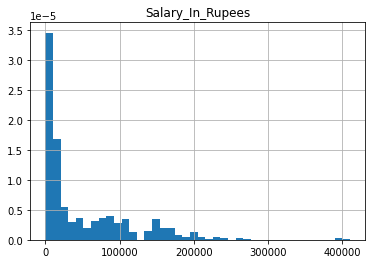

In [119]:
# формируем гистограмму
df.hist(column='Salary_In_Rupees', bins=40, density=True)


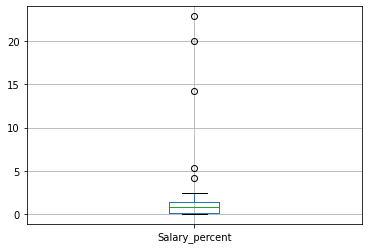

In [121]:
# Коробочный график
d_data.boxplot(column='Salary_percent')


In [122]:
# проверим итог по суммам ЗП, а также др. показатели
# Максимальное значение
print(df['Salary_In_Rupees'].max())
# Минимальное значение
print(df['Salary_In_Rupees'].min())
# Среднее значение
print(df['Salary_In_Rupees'].mean())
# Сумма
print(df['Salary_In_Rupees'].sum())

410357.1
46.05
51757.83861614498
31417008.040000003


Смотрим общую картину

In [123]:
# вычисляет различные сводные статистические данные
df.describe()

,Salary_In_Rupees,Remote_Working_Ratio
count,607.000000,607.00000
mean,51757.838616,70.92257
std,64255.311200,40.70913
min,46.050000,0.00000
25%,7464.880000,50.00000
50%,17890.800000,100.00000
75%,87310.020000,100.00000
max,410357.100000,100.00000


In [124]:
# выводим средний общий объем выплаченной зар.платы и средний удельный вес удаленной работы в разрезе рабочих лет и квалификации специалистов
df.groupby(['Working_Year', 'Experience']).mean()


Salary_In_Rupees  Remote_Working_Ratio
Working_Year Experience                                        
2020         EN              33321.421500             65.000000
             EX              40300.410000             75.000000
             MI              38103.088750             62.500000
             SE              71507.226111             66.666667
2021         EN              29012.335106             70.212766
             EX              78017.169091             63.636364
             MI              46588.964000             67.222222
             SE              56341.947681             71.739130
2022         EN              38072.985714             73.809524
             EX              78532.533846             92.307692
             MI              39309.279451             60.989011
             SE              64578.134974             78.238342

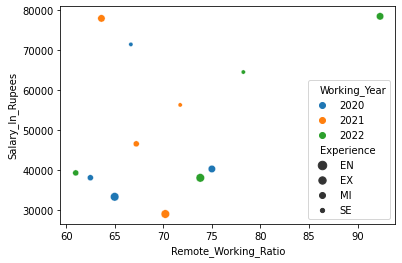

In [125]:
# точечный график, показывающий средний общий объем выплаченной ЗП при усредненной разной степени удаленной занятости
# в разрезе рабочих лет и опыта специалиста
d = df.groupby(['Working_Year', 'Experience']).mean()
sns.scatterplot(data=d, x="Remote_Working_Ratio", y="Salary_In_Rupees",hue="Working_Year",size = 'Experience')

Так как в датасете мало числовых значений, точечный график строить особо не на чем - если только показать связь усредненного удельного веса удаленной работы и средний объем выплаченной ЗП, в данном примере в разрезе опыта специалиста (в этом случае, мало информативен, на мой взгляд).

Построим линейный график, где для каждого рабочего года будем показывать средний объем выплаченной ЗП.


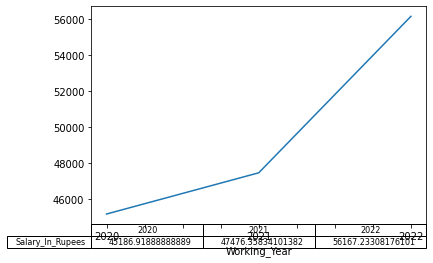

In [126]:
# линейный график
d = df.groupby('Working_Year').mean()['Salary_In_Rupees']
d.plot(table=True)

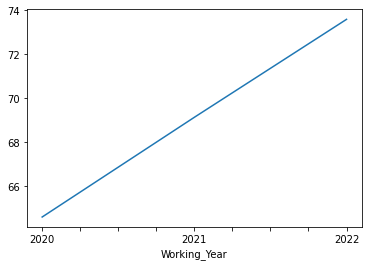

In [127]:
# линейный график - смотрим, как меняется удельный вес удаленной работы за период 2020-2022
d = df.groupby('Working_Year').mean()['Remote_Working_Ratio']
d.plot()

In [128]:
# фильтр - показать записи за 2022 год, где удельный вес удаленной работы max,т.е. 100%
# 228 из 607
df[(df['Remote_Working_Ratio'] == df['Remote_Working_Ratio'].max()) & (df['Working_Year']=='2022')]

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
289,2022,Data Engineer,SE,FT,21237.04,US,US,M,100
290,2022,Data Analyst,SE,FT,150367.26,US,US,M,100
291,2022,Data Analyst,SE,FT,11700.44,US,US,M,100
294,2022,Data Engineer,MI,FT,164918.93,US,US,M,100
295,2022,Data Engineer,MI,FT,145516.70,US,US,M,100
...,...,...,...,...,...,...,...,...,...
599,2022,Data Scientist,MI,FT,1639.03,US,US,M,100
602,2022,Data Engineer,SE,FT,14939.75,US,US,M,100
603,2022,Data Engineer,SE,FT,1533.23,US,US,M,100
605,2022,Data Analyst,SE,FT,145516.70,US,US,M,100


In [129]:
# число записей по каждой категории специалиста
df['Designation'].value_counts()


Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

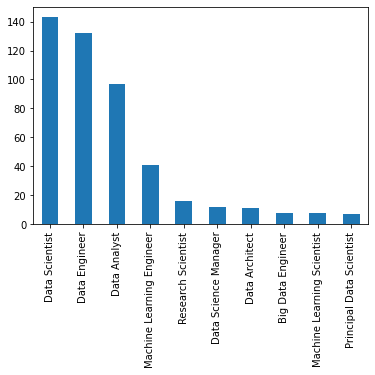

In [130]:
# Барный график - Построим первые 10 значений по числу записей в категории
# по сути видим распространенность профессии, где ФОТ значительно больше
d = df['Designation'].value_counts().head(10)
# [:10]
d.plot.bar()

Примерно ту же картину мы видим при распределении ФОТ в рамках профессий

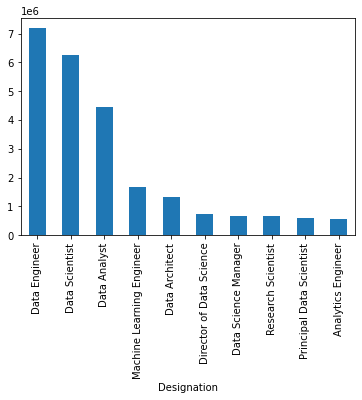

In [131]:
# Барный график - Построим первые 10 значений по размеру ФОТ в категории
d = sorted_df['Salary_In_Rupees'].head(10)
# [:10]
d.plot.bar()


**4 наиболее востребованные профессиональные направления:**

*   Data Scientist
*   Data Engineer
*   Data Analyst 
*   Machine Learning Engineer




                              
                                
                    

In [132]:
#объем выплат по годам
df.groupby(['Working_Year']).sum()['Salary_In_Rupees']


Working_Year
2020     3253458.16
2021    10302369.76
2022    17861180.12
Name: Salary_In_Rupees, dtype: float64

In [133]:
# посмотрим темпы прироста объемов выплат по ЗП в целом по отрасли
growth2021 = df.loc[(df['Working_Year'] == '2021'),['Salary_In_Rupees']].sum() / df.loc[(df['Working_Year'] == '2020'),['Salary_In_Rupees']].sum() 
print('Темп прироста 2021 к 2020: ',"{:.0%}".format(float(growth2021)))
growth2022 = df.loc[(df['Working_Year'] == '2022'),['Salary_In_Rupees']].sum() / df.loc[(df['Working_Year'] == '2021'),['Salary_In_Rupees']].sum() 
print('Темп прироста 2022 к 2021: ',"{:.0%}".format(float(growth2022)))


Темп прироста 2021 к 2020:  317%
Темп прироста 2022 к 2021:  173%


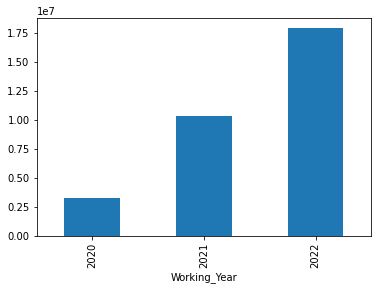

In [134]:
# Год выплаты заработной платы (2020, 2021, 2022) - объем выплат - барный график
d = df.groupby(['Working_Year']).sum()['Salary_In_Rupees']
d.plot.bar()

Отсюда видим, что объем выплат ЗП в отрасли растет с каждым годом
*   прирост в 2021 относительно 2020 - 317%
*   прирост в 2022 относительно 2021 - 173% 

Однако темп прироста сократился, что может говорить о сокращении потребности в новых сотрудниках в отрасли.




In [135]:
# смотрим значения уникальных элементов по столбцам для последующей выборки
df.apply(lambda col: col.unique())

Working_Year                                           [2020, 2021, 2022]
Designation             [Data Scientist, Machine Learning Scientist, B...
Experience                                               [MI, SE, EN, EX]
Employment_Status                                        [FT, CT, PT, FL]
Salary_In_Rupees        [77446.9, 327.81, 105765.42, 1940.22, 145516.7...
Employee_Location       [DE, JP, GB, HN, US, HU, NZ, FR, IN, PK, PL, P...
Company_Location        [DE, JP, GB, HN, US, HU, NZ, FR, IN, PK, CN, G...
Company_Size                                                    [L, S, M]
Remote_Working_Ratio                                         [0, 50, 100]
dtype: object

Посмотрим распределение базы по другим параметрам/колонкам.

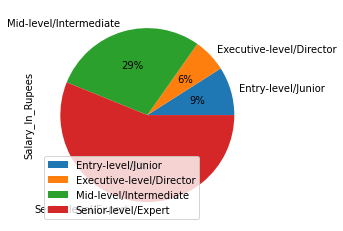

In [136]:
# круговая диаграмма в процентах - распределение ФОТ по уровню опыта 
df['Experience'] = df['Experience'].replace('EN','Entry-level/Junior')
df['Experience'] = df['Experience'].replace('MI','Mid-level/Intermediate')
df['Experience'] = df['Experience'].replace('SE','Senior-level/Expert')
df['Experience'] = df['Experience'].replace('EX','Executive-level/Director')
df.groupby(['Experience']).sum().plot(
    kind='pie', y='Salary_In_Rupees', autopct='%1.0f%%')

По имеющимся данным более половины объема выплаченной ЗП приходится на уровень 

'SE','Senior-level/Expert' - 56%

Остальные 44% распределены между:

'EN','Entry-level/Junior' - 9%

'MI','Mid-level/Intermediate' - 29%

'EX','Executive-level/Director' - 6%

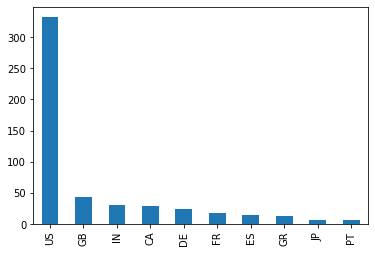

In [137]:
# Топ-10 Employee_Location - Местоположение сотрудника, посмотрим картину на барном графике
df['Employee_Location'].value_counts().head(10).plot(x='Employee_Location', y='Salary_In_Rupees', kind='bar')             

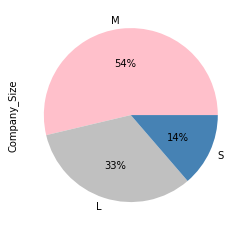

In [138]:
# График распределения объема выплат по ЗП по размерам компаний
size = df['Company_Size'].value_counts()
top = size
colors = ['pink', 'silver', 'steelblue']
top.plot(x='Company_Size', y=top.values, kind='pie', autopct='%1.0f%%',colors=colors) 


Здесь мы видим, что чуть больше половины объема ФОТ приходится на средние компании, чуть меньше половины распределены между крупными и малыми.

Company_Size Среднее количество людей, проработавших в компании в течение года.

S (малый) — менее 50 сотрудников, 14%

M (средний) — от 50 до 250 сотрудников, 54%

L (крупный) — более 250 сотрудников, 33%

In [139]:
# группировка по годам и степени удаленности выполняемых работ - показано количество записей
dw = df.groupby(['Working_Year','Remote_Working_Ratio']).count()[['Salary_In_Rupees']]
dw


Salary_In_Rupees
Working_Year Remote_Working_Ratio                  
2020         0                                   15
             50                                  21
             100                                 36
2021         0                                   34
             50                                  66
             100                                117
2022         0                                   78
             50                                  12
             100                                228

К 2022 году значительно сократилась 50%-ая удаленная занятость, при этом почти в два раза выросли показатели нулевой и 100%-ой удаленной занятости относительно прошлого года. В целом, объемы работ показывают рост.

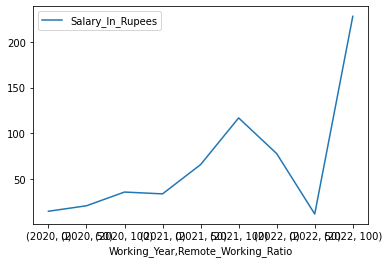

In [140]:
# Линейный график
# # группировка по годам и степени удаленности выполняемых работ - показано количество записей
dw.plot()


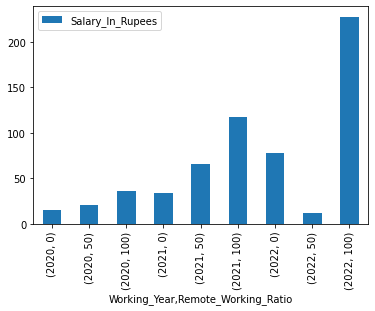

In [141]:
# Та же выборка, барный график
dw.plot.bar()

Посмотрим выборки по значениям типа занятости.

Employment_Status:

[PT – неполный рабочий день, FT – полный рабочий день, CT – контракт, FL – фриланс]

In [142]:
# отберем средний объем выплат на фрилансе за три года 
df.loc[(df['Employment_Status']== 'FL'),['Salary_In_Rupees']].mean()


Salary_In_Rupees    7275.835
dtype: float64

In [143]:
# суммы выплат всего по типам занятости
df.groupby('Employment_Status')['Salary_In_Rupees'].sum() 

Employment_Status
CT      408461.84
FL       29103.34
FT    30838945.34
PT      140497.52
Name: Salary_In_Rupees, dtype: float64

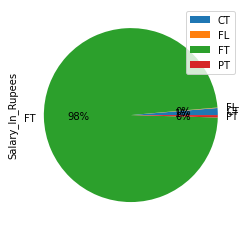

In [144]:
# отобразим выплаты по типам занятости на круговой диаграмме
df.groupby(['Employment_Status']).sum().plot(
    kind='pie', y='Salary_In_Rupees', autopct='%1.0f%%')

Видим, что основной объем выплат, 98% приходятся на работы при полной занятости.

In [145]:
# группировка в разрезе типов занятости, рабочих лет и уровня опыта - отображаем сумму выплат по подгруппам
df.groupby(['Employment_Status','Experience','Working_Year'])['Salary_In_Rupees'].sum().reset_index() 

,Employment_Status,Experience,Working_Year,Salary_In_Rupees
0,CT,Entry-level/Junior,2020,9701.11
1,CT,Entry-level/Junior,2022,30922.30
2,CT,Executive-level/Director,2021,4046.67
3,CT,Mid-level/Intermediate,2021,261930.06
4,CT,Senior-level/Expert,2021,101861.70
5,FL,Mid-level/Intermediate,2021,13581.56
6,FL,Mid-level/Intermediate,2022,9701.11
7,FL,Senior-level/Expert,2020,5820.67
8,FT,Entry-level/Junior,2020,635550.57
9,FT,Entry-level/Junior,2021,1327477.09


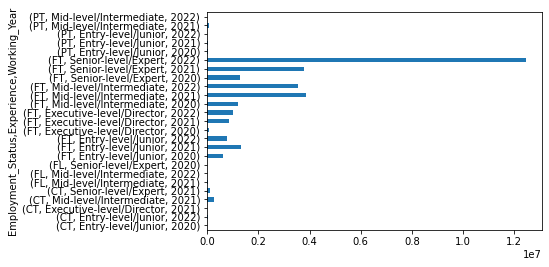

In [146]:
# посмотрим на графике
df.groupby(['Employment_Status','Experience','Working_Year'])['Salary_In_Rupees'].sum().plot.barh() 


In [147]:
# создали фрейм, отобрав значения, относящиеся к работам только при полной занятости, включив в него уровень опыта, рабочий год и объем выплат - 588 записей
de = df.loc[(df['Employment_Status'] == 'FT'),['Experience','Working_Year','Salary_In_Rupees']]
de


,Experience,Working_Year,Salary_In_Rupees
0,Mid-level/Intermediate,2020,77446.90
1,Senior-level/Expert,2020,327.81
2,Senior-level/Expert,2020,105765.42
3,Mid-level/Intermediate,2020,1940.22
4,Senior-level/Expert,2020,145516.70
...,...,...,...
602,Senior-level/Expert,2022,14939.75
603,Senior-level/Expert,2022,1533.23
604,Senior-level/Expert,2022,15416.37
605,Senior-level/Expert,2022,145516.70


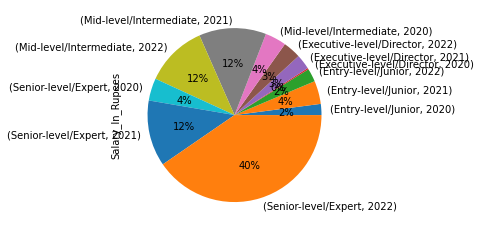

In [148]:
# строим круговую диаграмму по группировке в разрезе опыта и года при полной занятости
de.groupby(['Experience','Working_Year'])['Salary_In_Rupees'].sum().plot(
     kind='pie', y='Salary_In_Rupees', autopct='%1.0f%%') 

Отберем и проанализируем записи, где значения объема выплат ЗП выше среднего.

In [149]:
# Отбираем данные, где объем выплат ЗП выше среднего
high_level = df[df['Salary_In_Rupees']>df['Salary_In_Rupees'].mean()]
high_level


,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,Mid-level/Intermediate,FT,77446.90,DE,DE,L,0
2,2020,Big Data Engineer,Senior-level/Expert,FT,105765.42,GB,GB,M,50
4,2020,Machine Learning Engineer,Senior-level/Expert,FT,145516.70,US,US,L,50
9,2020,Lead Data Engineer,Senior-level/Expert,FT,121263.92,NZ,NZ,S,50
13,2020,Lead Data Analyst,Mid-level/Intermediate,FT,84399.69,US,US,L,100
...,...,...,...,...,...,...,...,...,...
594,2022,Data Analytics Manager,Senior-level/Expert,FT,145768.93,US,US,M,100
595,2022,Data Analytics Manager,Senior-level/Expert,FT,106013.77,US,US,M,100
597,2022,Data Analyst,Senior-level/Expert,FT,164918.93,US,US,M,100
600,2022,Data Analyst,Entry-level/Junior,FT,64997.47,CA,CA,M,0


In [150]:
# находим сумму выплат выше среднего
high_level.Salary_In_Rupees.sum()

26296899.68

Проведем группировки и визуализацию в полученном датафрейме high level.

Посмотрим Топ - 7 стран по объему выплат выше среднего


In [151]:
# сумма выплат выше среднего по отрасли - по странам нахождения компании. Сортирован по убыванию
high_level=high_level.groupby(['Company_Location']).sum()[['Salary_In_Rupees']].sort_values(by='Salary_In_Rupees', ascending=False)
high_level

,Salary_In_Rupees
Company_Location,
US,20421873.31
GB,1619586.41
CA,1137563.26
DE,975957.21
AU,314440.25
JP,309818.65
ES,262437.43
FR,196514.48
AT,160424.39


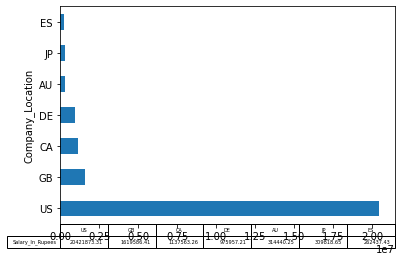

In [152]:
# График - Построим первые 7 значений по размеру ФОТ по странам
d = high_level['Salary_In_Rupees'].head(7)
d.plot.barh(table=True)

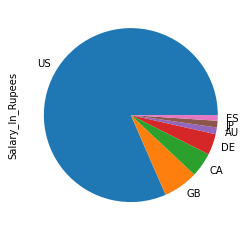

In [153]:
# Та же группировка - на круговой диаграмме
d.plot.pie()